In [1]:
'''
#. What is Feature Selection ?
-> Feature -> Input Columns.
'''

'\n#. What is Feature Selection ?\n-> Feature -> Input Columns.\n'

In [ ]:
import pandas as pd

!kaggle datasets download -d uciml/human-activity-recognition-with-smartphones

Dataset URL: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones
License(s): CC0-1.0
 57% 14.0M/24.5M [00:00<00:00, 145MB/s]
100% 24.5M/24.5M [00:00<00:00, 167MB/s]


In [ ]:
!unzip human-activity-recognition-with-smartphones.zip -d dataset

Archive:  human-activity-recognition-with-smartphones.zip
  inflating: dataset/test.csv        
  inflating: dataset/train.csv       


In [ ]:
df = pd.read_csv('/content/dataset/train.csv').drop(columns='subject')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [ ]:
df['Activity'].value_counts()

,count
Activity,
LAYING,1407
STANDING,1374
SITTING,1286
WALKING,1226
WALKING_UPSTAIRS,1073
WALKING_DOWNSTAIRS,986


In [ ]:
print(df.shape)

(7352, 562)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Separate features and target
X = df.drop('Activity', axis=1)
y = df['Activity']

In [ ]:
# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5881, 561)
(1471, 561)


### **Applying Logistic Regression**

In [ ]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9809653297076818


### **1. Removing Duplicate Columns**

In [ ]:
def get_duplicate_columns(df):

    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [ ]:
duplicate_columns = get_duplicate_columns(X_train)

In [ ]:
duplicate_columns

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [ ]:
X_train[['tBodyAccMag-mean()','tBodyAccMag-sma()','tGravityAccMag-mean()','tGravityAccMag-sma()']]

,tBodyAccMag-mean(),tBodyAccMag-sma(),tGravityAccMag-mean(),tGravityAccMag-sma()
57,-0.997420,-0.997420,-0.997420,-0.997420
4154,-0.133797,-0.133797,-0.133797,-0.133797
6945,0.130528,0.130528,0.130528,0.130528
527,-0.955222,-0.955222,-0.955222,-0.955222
4196,-0.992499,-0.992499,-0.992499,-0.992499
...,...,...,...,...
5191,-0.372758,-0.372758,-0.372758,-0.372758
5226,-0.256033,-0.256033,-0.256033,-0.256033
5390,-0.434138,-0.434138,-0.434138,-0.434138
860,-0.983969,-0.983969,-0.983969,-0.983969


In [ ]:
for one_list in duplicate_columns.values():
    # one_list takes the duplicate column from the "duplicate_columns" and dropping the duplicate columns from the X_train.
    X_train.drop(columns=one_list, inplace=True)
    X_test.drop(columns=one_list, inplace=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5881, 540)
(1471, 540)


### **2. Variance Threshold**

In [ ]:
'''
Features might Contains two types of values:
a. Constant Features:
    - Constant features are those that show the same value, just one value, for all the observations of the dataset. This is, the same value for all the rows of the dataset. These features provide no information that allows a machine learning model to discriminate or predict a target.
    - In this case, variance of the feature is zero.

b. QuasiConstant Features:
    - Quasi-constant features are those that show the same value for the great majority of the observations of the dataset. In general, these features provide little if any information that allows a machine learning model to discriminate or predict a target. But there can be exceptions. So we should be careful when removing these type of features. Identifying and removing quasi-constant features, is an easy first step towards feature selection and more easily interpretable machine learning models.
'''

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)

sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [ ]:
# get_support -> is a boolean vector that indicates which features are retained.
# If we sum over get_support, we get the number of features that are not constant.

sum(sel.get_support())

np.int64(349)

In [ ]:
columns = X_train.columns[sel.get_support()]
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=349)

In [ ]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5881, 349)
(1471, 349)


In [ ]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.994939,-0.993994,-0.995450,-0.938974,-0.577031,-0.813863,0.846922,...,0.394506,-0.684497,-0.901888,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.343326,0.039623,-0.256327,-0.310961,0.085617,-0.411806,0.271334,...,0.052089,-0.131946,-0.591721,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,-0.118256,-0.030279,0.432861,0.370607,-0.072309,0.200747,0.118277,...,-0.038923,-0.643660,-0.935668,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.984417,-0.901405,-0.965788,-0.922291,-0.524676,-0.807362,0.825370,...,-0.145084,-0.326860,-0.645937,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.997331,-0.985196,-0.983768,-0.942062,-0.564033,-0.810993,0.853330,...,0.096524,-0.113724,-0.445144,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577


## **3.Correlation**

In [ ]:
import seaborn as sns

<Axes: >

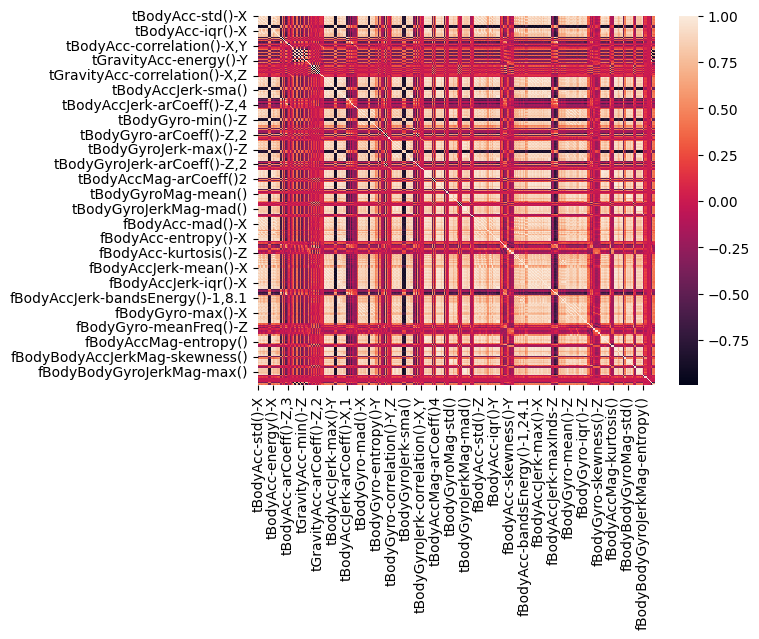

In [ ]:
sns.heatmap(X_train.corr())

In [ ]:
sns.heatmap(X_train.corr())

# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

columns_to_drop = set(columns_to_drop) # set always store the unique elements.

len(columns_to_drop)

X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

1508


In [ ]:
columns_to_drop = set(columns_to_drop) # set always store the unique elements.

len(columns_to_drop)

In [ ]:
len(columns_to_drop)

197

In [ ]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)


(5881, 152)
(1471, 152)


In [ ]:
X_train

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.813863,0.846922,0.691468,0.846423,-0.611174,-0.768785,-0.663066,...,0.043182,0.394506,-0.684497,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.411806,0.271334,0.039452,0.269204,0.403663,0.180054,0.176069,...,-0.225796,0.052089,-0.131946,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,0.200747,0.118277,0.072295,0.245986,0.318557,0.135103,0.087680,...,-0.346388,-0.038923,-0.643660,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.807362,0.825370,0.642789,0.815368,-0.376515,-0.171730,-0.496816,...,0.197311,-0.145084,-0.326860,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.810993,0.853330,0.687431,0.844895,-0.652548,-0.678458,-0.486837,...,0.310607,0.096524,-0.113724,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.555352,-0.104055,-0.438064,-0.373579,0.454289,0.153427,0.475699,0.455070,0.288106,0.191017,...,-0.490616,0.022624,0.417731,-0.155279,-0.137981,0.929236,-0.583898,-0.703989,0.159112,-0.185944
5877,-0.290043,-0.212102,-0.469731,-0.123285,0.123907,0.202561,0.577615,0.345742,0.159941,0.085557,...,-0.846175,-0.039773,-0.021970,-0.019533,-0.896005,-0.039591,0.494178,-0.670139,0.106156,-0.220746
5878,-0.627198,-0.216566,-0.424764,-0.441355,0.530629,0.077330,0.469639,0.436434,0.322259,0.086872,...,-0.609038,0.094031,0.527152,-0.414621,-0.488542,0.095895,-0.297162,-0.856512,0.183547,-0.034939
5879,-0.994825,-0.985314,-0.965857,-0.805684,0.849776,0.688222,0.828575,-0.542681,-0.667647,-0.431412,...,-0.327943,0.539885,-0.889671,-0.079515,0.014291,-0.290347,0.602344,-0.839693,0.081388,-0.098270


## **4. ANOVA**

In [ ]:
'''
Univariate feature selection methods works by selecting the best features based on univariate statistical tests like ANOVA. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method.

f-statistic -> estimate the degree of linear dependency between two random variables. They assume a linear relationships between the feature and the target. These method also assume that the variables follow a Gaussian distributions.

- There are 4 methods that fall under this category :-

    a. SelectKBest
    b. SelectPercentile
    c. SelectFpr, SelectFdr, or family wise error SelectFwe
    d. GenericUnivariateSelection
'''

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

sel = SelectKBest(f_classif, k=100).fit(X_train, y_train)

# Display selected feature names.
X_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [ ]:
columns = X_train.columns[sel.get_support()]

In [ ]:
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [ ]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5881, 100)
(1471, 100)


In [ ]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyGyro-meanFreq()-Z,"fBodyGyro-bandsEnergy()-1,8.1",fBodyAccMag-maxInds,fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyGyroMag-meanFreq(),"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.813863,0.846922,0.691468,0.846423,-0.611174,-0.768785,-0.663066,...,-0.158283,-0.999962,0.172414,-0.986305,0.132640,-0.690000,-0.024257,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.411806,0.271334,0.039452,0.269204,0.403663,0.180054,0.176069,...,-0.315738,-0.898022,-0.517241,-0.718822,0.144767,-0.316666,0.191186,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,0.200747,0.118277,0.072295,0.245986,0.318557,0.135103,0.087680,...,-0.071045,0.192158,-0.793103,-0.290424,-0.088077,-0.270995,-0.431985,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.807362,0.825370,0.642789,0.815368,-0.376515,-0.171730,-0.496816,...,-0.629423,-0.996263,-0.931034,-0.997886,-0.027783,-0.651181,-0.567748,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.810993,0.853330,0.687431,0.844895,-0.652548,-0.678458,-0.486837,...,0.261846,-0.999927,-1.000000,-0.988139,0.668020,-0.598248,-0.257360,-0.615329,0.322236,0.161577


In [ ]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9694085656016316


## **5. Chi-square Test**

In [ ]:
'''
Chi-square test --> apply between the categorical features in classification tasks. It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.
'''

'\nChi-square test --> apply between the categorical features.\n'

In [ ]:
!kaggle datasets download -d heptapod/titanic

Dataset URL: https://www.kaggle.com/datasets/heptapod/titanic
License(s): DbCL-1.0
  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 29.1MB/s]


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: train_and_test2.csv     


In [ ]:
titanic = pd.read_csv('/content/train.csv')[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]

In [ ]:
titanic.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0


In [ ]:
ct = pd.crosstab(
    titanic['Survived'],
    titanic['Sex'],
    margins=True
)

In [ ]:
ct

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [ ]:
'''
chi2_contingency(ct) -> contains several important values related to the Chi-Sqaure test of indepdennce which checks if two categorical variables (in this case, Sex & Survived) are independent.

'''

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

Chi2ContingencyResult(statistic=np.float64(263.05057407065567), pvalue=np.float64(1.0036732821369117e-55), dof=4, expected_freq=array([[193.47474747, 355.52525253, 549.        ],
       [120.52525253, 221.47474747, 342.        ],
       [314.        , 577.        , 891.        ]]))

Observation:

1. Test statistic (chi-square value): 263.050 -> High value suggests a strong association between the two variables.

2. p-value: 1.0036732821369117e-55 : which tells us whether the observed differnces are statistically significant or not.

Since this value is extremely small (0.05), we reject the null hypothesis and conclude that sex and survival are not independent meaning that gender played a significant role in survival.

3. Degrees of freedom (df):
 calculated as:

    (rows - 1) * (columns - 1)

    Here, we have,

    * 3 rows (Survived = 0, 1, All).

    * 3 Columns (female, male, All).

    * So, (3-1) * (3-1) = 4

4. Expected Frequencies (array):

This matrix shows the expected counts of passengers in each category if Sex and Survival were independent.

    Observed values (ct):

        female  male  All
    0    81    468   549
    1   233    109   342
    All  314   577   891

    Expected Values (from the Chi-Square Test):
       female  male  All
    0   193.47  355.52  549
    1   120.52  221.47  342
    All  314    577     891

**Final Interpretation**

* The very small p-value (< 0.05) tells us that Survival and Gender are statistically dependent.

* Women had a significantly higher survival rate than expected under an independent assumption.

* The high Chi-Square statistic (263.05) confirms a strong relationship between the two variables.

This means that Sex had a significant impact on Survival on the Titanic

In [ ]:
score = []

for feature in titanic.columns[:-1]:

    # create contingency table
    ct = pd.crosstab(titanic['Survived'], titanic[feature])

    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)


<Axes: >

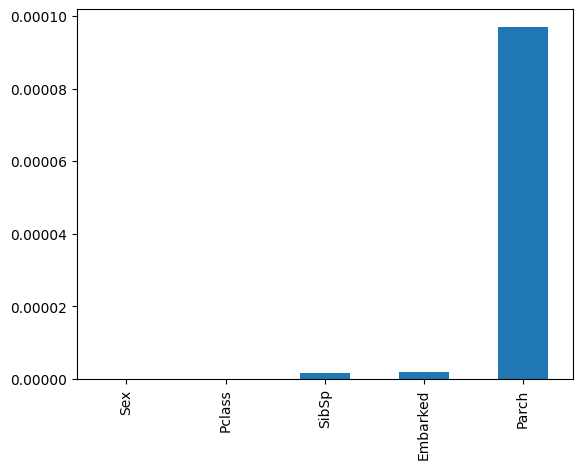

In [ ]:
pd.Series(score, index=titanic.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

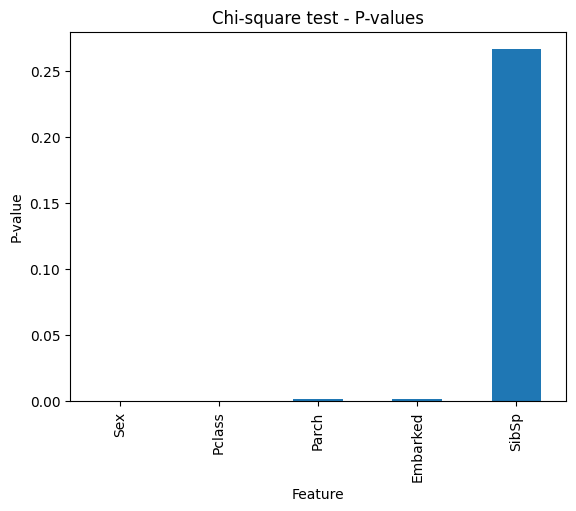

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# assuming titanic is your DataFrame and 'Survived' is the target column

# Encode categorical variables
le = LabelEncoder()
titanic_encoded = titanic.apply(le.fit_transform)

X = titanic_encoded.drop('Survived', axis=1)
y = titanic_encoded['Survived']

# Calculate chi-squared stats
chi_scores = chi2(X, y)

# chi_scores[1] are the p-values of each feature.
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)

# Plotting the p-values
p_values.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()

## **TASK**

In [ ]:
import pandas as pd

data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQtBXo5cBnDsM2fmfHPm6u72KGUS5FjPHNGMxOfYjA9-CAhmnRpwkIw_rOR3sANJIToiUU__6fbBvig/pub?gid=572763137&single=true&output=csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [ ]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
# Understanding the distribution of thet target features which is categorical numerical data.
data['Pass/Fail'].value_counts()

,count
Pass/Fail,
-1,1463
1,104


-1 -> represent the pass.

1 -> represent the fails.

Time -> represent the testing time.

In [ ]:
print(df.shape)

(7352, 562)


In [ ]:
data['Time']

,Time
0,2008-07-19 11:55:00
1,2008-07-19 12:32:00
2,2008-07-19 13:17:00
3,2008-07-19 14:43:00
4,2008-07-19 15:22:00
...,...
1562,2008-10-16 15:13:00
1563,2008-10-16 20:49:00
1564,2008-10-17 05:26:00
1565,2008-10-17 06:01:00


In [ ]:
df_secom = data.drop('Time', axis=1)
df_secom

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [ ]:
print(df_secom.shape)

(1567, 591)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X.shape, y.shape

((1567, 590), (1567,))

In [ ]:
X_train.isna().sum()

,0
0,5
1,3
2,14
3,14
4,14
...,...
585,1
586,1
587,1
588,1


In [ ]:
import numpy as np

for column in df_secom.columns:

    # Get the minimum & maximum vales of the column.
    min_value = df_secom[column].min()
    max_value = df_secom[column].max()

    # Generate the random numbers within the range.
    random_values = np.random.uniform(min_value, max_value, size=df_secom[column].isnull().sum())

    # Creating a pandas a series with the random values.
    random_series = pd.Series(
        random_values,
        index=data[column][data[column].isnull()].index
    )

    # Fill NaN values with the random series.
    df_secom[column].fillna(random_series, inplace=True)


<ipython-input-114-8481a8b3330c>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_secom[column].fillna(random_series, inplace=True)


In [ ]:
df_secom.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
586,0
587,0
588,0
589,0


In [ ]:
# Separate features and target.
X = df_secom.drop('Pass/Fail', axis=1)
y = df_secom['Pass/Fail']

In [ ]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Train Data: ", X_train.shape)
print("Test Data: ", X_test.shape)

Train Data:  (1253, 590)
Test Data:  (314, 590)


In [ ]:
# Initialize & train logistic regression model.
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Make Predictions on the test set.
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score.
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.8980891719745223


To perform filter-based feature selection on the "UCI SECOM" dataset, which has 592 columns and a target column called "Pass/Fail," we can utilize the following methods:

1. Duplicate Features:
   - Identify and remove duplicate columns from the dataset. Columns with identical values provide redundant information and do not contribute to the prediction task.

2. Variance Threshold Method:
   - Calculate the variance of each feature.
   - Remove features with low variance, as they tend to have little or no predictive power.
   - Set a threshold value for variance and remove features below that threshold.

3. Correlation:
   - Compute the correlation matrix of the features.
   - Identify highly correlated features and choose one from each highly correlated group.
   - High correlation between features indicates redundancy, and removing one from each correlated group helps reduce multicollinearity.

4. ANOVA (Analysis of Variance):
   - Perform an ANOVA test between each feature and the target variable ("Pass/Fail").
   - Select features with a significant impact on the target variable.
   - Set a significance level (e.g., p-value threshold) for the test to determine the importance of each feature.

5. Chi-Squared:
   - Apply the Chi-Squared test between each feature and the target variable, considering both features as categorical.
   - Select features with a significant association with the target variable.
   - Set a significance level (e.g., p-value threshold) to determine the importance of each feature.

Implementing these feature selection methods in Python using the "UCI SECOM" dataset can be done as follows:

In [124]:
# Duplicate features.

from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif
from scipy.stats import pearsonr

# Get the subset of the duplicated features.
duplicated_cols = df_secom.columns[df_secom.T.duplicated()]

# Remove the duplicated columns.
df_secom = df_secom.drop(
    columns=duplicated_cols
)

# Numbers Of Columns after removing Duplicate columns
print("Number of Columns after removing duplicate columns- ", df_secom.shape[1])

Number of Columns after removing duplicate columns-  479


In [127]:
# Implementing the Variance Threshold.
# Variance threshold basically deals with features which contains constant values and QuasiConstant Value.
selector = VarianceThreshold(threshold=0.01)
sel = selector.fit(df_secom)

columns = df_secom.columns[sel.get_support()]

data_vt = sel.transform(df_secom)

data_vt = pd.DataFrame(
    data_vt,
    columns=columns
)

# Numbers Of Columns after Variance Threshold Method.
print("Number of Columns after Variance Threshold Method- ", data_vt.shape[1])

Number of Columns after Variance Threshold Method-  323


<Axes: >

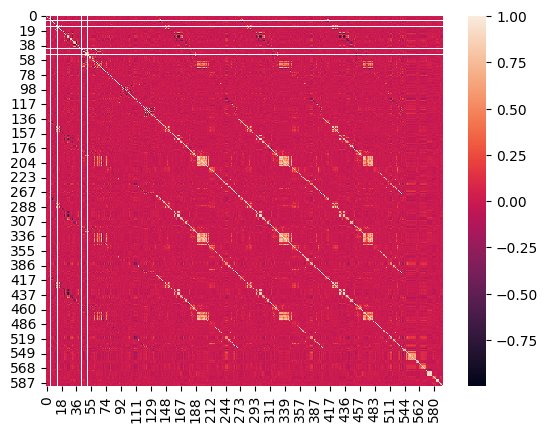

In [129]:
# Correlation.
sns.heatmap(df_secom.corr())

In [130]:
# Get the column names of the DataFrame
corr_matrix = data_vt.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
data_corr = data_vt.drop(to_drop, axis=1)

# Numbers Of Columns after Variance Threshold Method
print("Number of Columns after Correlation- ", data_corr.shape[1])

Number of Columns after Correlation-  200


In [131]:
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 200 entries, 0 to Pass/Fail
dtypes: float64(200)
memory usage: 2.4 MB


In [132]:
# Since, ANOVA cannot be done here. because every rows of the dataset have some NaN avlues. ANOVA can't be applied on data having NaN values.

'''
We can still perform ANOVA analysis by considering each column separately.

ANOVA can be applied to each column individually, comparing the target variable which is Pass/Fail column in our case against the non-missing values in that specific column.

We will drop NaN values of each column before performing the ANOVA
'''

# **Wrapper Method.**

In [ ]:
'''
F1, F2, F3  ...... FN, y.
Generate the subset of the feature.
f1, f2, y -> train ML Algorithm. -> calcualte R2-Score.
f1, f2, f3 -> train ML Algorithm. -> calcualte R2-Score.
f1, f5, f6 -> train ML Algorithm. -> calcualte R2-Score.

Highest Score Good the model is And This subset will be taken into account.
Types:
    1. Exhaustive Feature Selection/Best subset feature selection.
    2. Forward Feature Selection.
    3. Backward Feature Selection.
    4. Recursive Feature Selection.
'''

In [133]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import cross_val_score

In [134]:
!pip install --upgrade scikit-learn mlxtend

In [135]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [136]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
lr = LogisticRegression()
sel = EFS(lr, max_features=4, scoring="accuracy", cv=5)

In [137]:
# Separating the data.
X = df.iloc[:, :4]
y = df['species']

model = sel.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Features: 15/15

In [138]:
model.best_score_

np.float64(0.9733333333333334)

In [139]:
model.best_feature_names_

('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [140]:
# detailed output.
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': np.float64(0.7533333333333333),
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.53333333, 0.63333333]),
  'avg_score': np.float64(0.5599999999999999),
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.9533333333333334),
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': np.float64(0.96),
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.9       ]),
  'avg_score': np.float64(0.8200000000000001),
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': 

In [148]:
#
metric_df = pd.DataFrame.from_dict(
    model.get_metric_dict()
).T

In [149]:
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.56,"(sepal_width,)",0.049963,0.038873,0.019437
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.82,"(sepal_length, sepal_width)",0.079462,0.061824,0.030912
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472


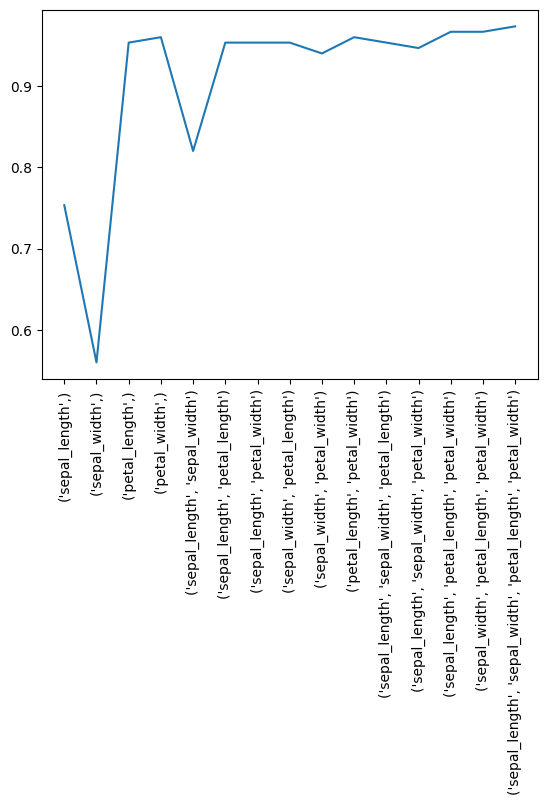

In [150]:
import matplotlib.pyplot as plt

plt.plot(
    [str(k) for k in metric_df["feature_names"]],
    metric_df['avg_score']
)
plt.xticks(rotation=90)
plt.show()

### **Regression Example.**

In [151]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [152]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [153]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [154]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81
58,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,8,284,19.7,390.68,6.86
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34
424,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16


In [155]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [156]:
# baseline model.
from sklearn.metrics import r2_score

model = LinearRegression()

# cross-validation-score -> provides the average score of the model in the unseen data.
print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096213
testing 0.6514899901155404


In [160]:
lr = LinearRegression()

exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True,n_jobs=-1)

sel = exh.fit(X_train, y_train)

Features: 8191/8191

In [161]:
sel.best_score_

np.float64(0.6827988156800064)

In [162]:
sel.best_feature_names_

('0', '1', '4', '5', '7', '8', '9', '10', '11', '12')

In [164]:
# Converting into the DataFrame.
metric_df = pd.DataFrame.from_dict(
    sel.get_metric_dict()
).T

In [165]:
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.03941987916919121, 0.12695789031653215, -0....",0.129009,"(0,)",0.064226,0.086475,0.028825
1,"(1,)","[0.14236716209182765, -0.10598329567838705, 0....",0.100963,"(1,)",0.076751,0.103339,0.034446
2,"(2,)","[0.4055276765549378, 0.0029283993633670846, -0...",0.210465,"(2,)",0.139709,0.188107,0.062702
3,"(3,)","[-0.07110886674980432, -0.08269807310551558, 0...",-0.025663,"(3,)",0.055426,0.074627,0.024876
4,"(4,)","[0.18869831316675012, 0.03113193162308736, 0.0...",0.17746,"(4,)",0.114827,0.154605,0.051535
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8791441026861513, 0.5762263847142655, 0.435...",0.679213,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.096133,0.129436,0.043145
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8731761731752512, 0.5384374917854683, 0.458...",0.679018,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.098986,0.133276,0.044425
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.849462727807239, 0.5454006150975992, 0.4449...",0.66547,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.099036,0.133343,0.044448
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.8358451877451422, 0.5448662375728606, 0.449...",0.670075,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.094633,0.127415,0.042472


In [167]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1)
    return 1 - (1 - r2) * coef

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

In [168]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [169]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218562
testing 0.7205819296124483


## **Sequential Backward Elimination**

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [173]:
# load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# separate the target variable
X = data.drop("medv", axis=1)
y = data['medv']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)

(404, 13)


In [174]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [175]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096213
testing 0.6514899901155404


In [176]:
lr = LinearRegression()

# perform backward elimination
sfs = SFS(lr, k_features='best', forward=True, floating=False, scoring='r2',cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 13),
                          scoring='r2')

In [178]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [179]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
1,"(12,)","[0.5472998394577442, 0.49002001493399727, 0.53...",0.538451,"(12,)",0.032755,0.025485,0.012742,404,1,0.537303
2,"(5, 12)","[0.6330856272904802, 0.5779812120755249, 0.586...",0.613259,"(5, 12)",0.034066,0.026505,0.013252,404,2,0.61133
3,"(5, 10, 12)","[0.7215896884753017, 0.6288372046797153, 0.633...",0.661012,"(5, 10, 12)",0.04259,0.033136,0.016568,404,3,0.65847
4,"(5, 10, 11, 12)","[0.725877216548624, 0.6342604286872173, 0.6558...",0.667383,"(5, 10, 11, 12)",0.039611,0.030819,0.01541,404,4,0.664048
5,"(5, 7, 10, 11, 12)","[0.7440756174774324, 0.6473449858158778, 0.614...",0.671496,"(5, 7, 10, 11, 12)",0.055057,0.042836,0.021418,404,5,0.667369
6,"(4, 5, 7, 10, 11, 12)","[0.7554472741494642, 0.6695521143038103, 0.653...",0.68562,"(4, 5, 7, 10, 11, 12)",0.047626,0.037054,0.018527,404,6,0.680869
7,"(1, 4, 5, 7, 10, 11, 12)","[0.7548843433907461, 0.6798073590310515, 0.662...",0.6913,"(1, 4, 5, 7, 10, 11, 12)",0.042762,0.03327,0.016635,404,7,0.685844
8,"(0, 1, 4, 5, 7, 10, 11, 12)","[0.7678201537729973, 0.6827004362205138, 0.671...",0.695442,"(0, 1, 4, 5, 7, 10, 11, 12)",0.048774,0.037948,0.018974,404,8,0.689274
9,"(0, 1, 4, 5, 7, 8, 10, 11, 12)","[0.7746648196407366, 0.6850585456872307, 0.683...",0.703763,"(0, 1, 4, 5, 7, 8, 10, 11, 12)",0.04762,0.03705,0.018525,404,9,0.696996
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905563, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,404,10,0.702654


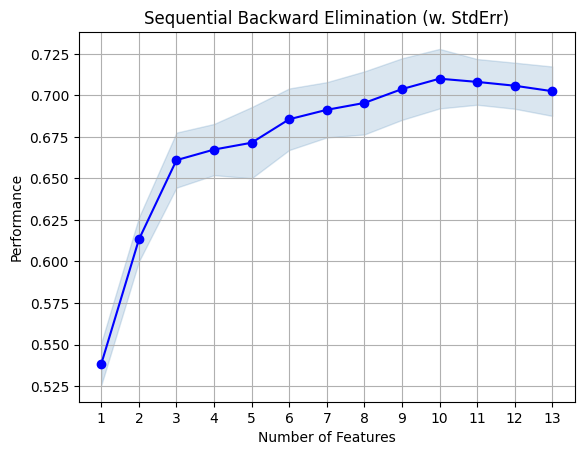

In [180]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [181]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218562
testing 0.7205819296124483


In [182]:
X_train_sel.shape

(404, 10)

## **Using Sklearn.**

In [184]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

sfs2 = SFS(model,
           n_features_to_select=5,
           direction='forward',
           scoring='r2',
           n_jobs=-1,
           cv=5)

sfs2 = sfs2.fit(X_train, y_train)

## **TASK - Wrapper Methods**

In [2]:
!kaggle datasets download -d rajyellow46/wine-quality

Dataset URL: https://www.kaggle.com/datasets/rajyellow46/wine-quality
License(s): other
  0% 0.00/98.0k [00:00<?, ?B/s]
100% 98.0k/98.0k [00:00<00:00, 67.2MB/s]


In [3]:
!unzip wine-quality.zip

Archive:  wine-quality.zip
  inflating: winequalityN.csv        


In [6]:
import pandas as pd

df_wine = pd.read_csv("/content/winequalityN.csv")
df_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression, LinearRegression

In [14]:
# Since wine quality dataset contains the some null values so we cannot directly apply the LogisticRegression algorithms.


In [16]:
# Filling the null values with mean.
df_wine.fillna(0, inplace=True)

In [17]:
df_wine.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


# **Embedded Methods**

In [18]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
from sklearn.model_selection import train_test_split

# Separating the data into train and test split.
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [20]:
X_train.shape

(614, 8)

In [21]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [22]:
from sklearn.preprocessing import StandardScaler

cols = X_train.columns

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=cols)

In [25]:
X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.516591,0.750524,0.564756,1.652015,0.437496,0.795825,0.529526,0.567932
1,1.812018,0.244752,-0.347904,1.020973,-0.678474,1.228654,-0.069689,0.398450
2,0.925736,-0.608739,0.260536,1.273390,0.222886,0.704013,-0.794249,0.991638
3,1.221164,-0.039745,0.463350,-1.250779,-0.678474,-0.896139,-0.167519,2.601722
4,-0.551400,-0.039745,0.361943,1.084077,0.222886,1.031914,-0.760619,-0.364222


In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [27]:
lasso.coef_

array([ 0.        ,  0.1267733 , -0.        ,  0.        ,  0.        ,
        0.00480181,  0.        ,  0.        ])

<Axes: >

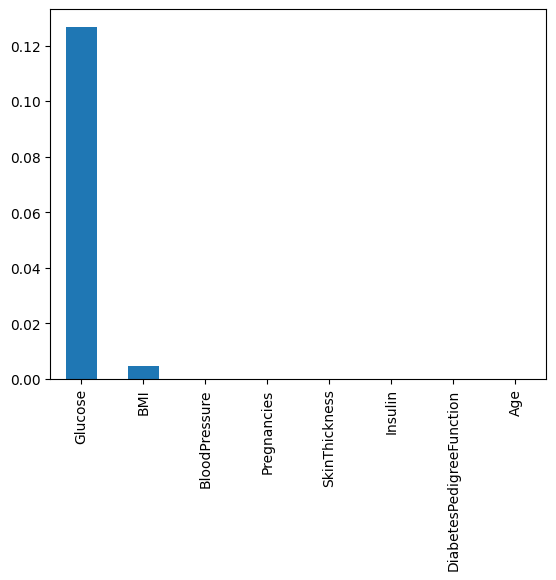

In [30]:
import numpy as np

x = pd.Series(np.abs(lasso.coef_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

### **Feature Selection Using Decision Trees**

In [35]:
df_dt = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

In [36]:
df_dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
X = df_dt.iloc[:, 0:-1]
y = df_dt.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [38]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

print(dt.fit(X_train, y_train))
print(rf.fit(X_train, y_train))

DecisionTreeClassifier()
RandomForestClassifier()


In [40]:
rf.feature_importances_

array([0.08451839, 0.25659581, 0.08744336, 0.06792544, 0.07920345,
       0.16460704, 0.11721653, 0.14248997])

<Axes: >

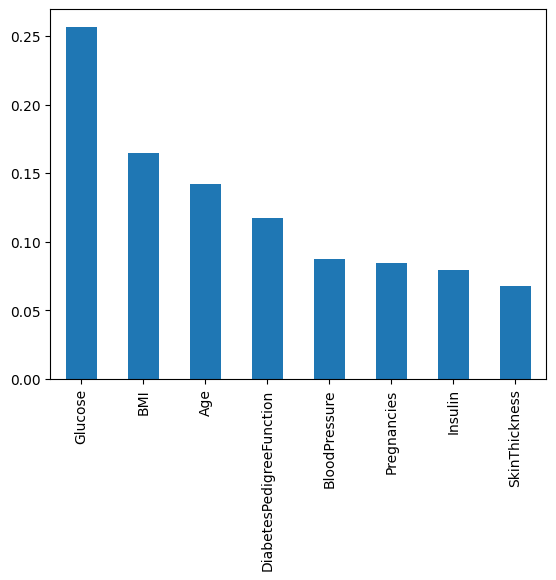

In [41]:
x = pd.Series(np.abs(rf.feature_importances_), index=cols)
x.sort_values(ascending=False).plot(kind="bar")

### **SelectFromModel**

In [44]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [48]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(model, threshold="mean") # select that feature whose importance exceeds the mean importance.

sfm.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold='mean')

In [49]:
sfm.get_support(indices=True) # It return the indices of the selected features.

array([1, 5, 7])

In [51]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BMI', 'Age'], dtype=object)

In [54]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(
    X_train_trans,
    columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose,BMI,Age
0,145.0,37.9,40.0
1,129.0,41.2,38.0
2,102.0,37.2,45.0
3,120.0,25.0,64.0
4,120.0,39.7,29.0
...,...,...,...
609,157.0,39.4,30.0
610,187.0,33.9,34.0
611,126.0,43.4,42.0
612,171.0,43.6,26.0


### **Recursive Feature Selection**

In [56]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [57]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [58]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [60]:
rf.feature_importances_

array([0.08208517, 0.02159127, 0.4171893 , 0.47913425])

In [63]:
# # since sepal width show the very less feature importance so dropping that column.
# X.drop(columns='sepal_width',inplace=True)
# X.head()

In [64]:
# Again Implementing the random forest to find our the best importance features.
rf = RandomForestClassifier()
rf.fit(X,y)

rf.feature_importances_

array([0.19269096, 0.37819821, 0.42911083])

In [65]:
# Now, sepal length show the very less feature importance so dropping that as well.
X.drop(columns='sepal_length',inplace=True)
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [66]:
# Again repeating the same.
rf = RandomForestClassifier()
rf.fit(X,y)

rf.feature_importances_

array([0.50796186, 0.49203814])

## **Skearn Recursive Feature Elimination**

In [68]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

# Load Iris Dataset.
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [69]:
# Separate features and target values.
X = df.drop("species", axis=1)
y = df['species']

In [70]:
# Initialize RandomForestClassifier
model = RandomForestClassifier()

In [72]:
# Initialize RFE or Recursive Feature Selection.
rfe = RFE(estimator=model, n_features_to_select=1)

In [73]:
# Fit RFE
rfe.fit(X, y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=1)

In [74]:
# Print the ranking
ranking = rfe.ranking_
print("Feature ranking:")

Feature ranking:


In [75]:
for i, feature in enumerate(X.columns):
    print(f"{feature}: {ranking[i]}")

sepal_length: 3
sepal_width: 4
petal_length: 1
petal_width: 2
